# Cooperative Binding Kinetics

## Motivation

Some processes involving enzymes do not follow Michaelis-Menten kinetics. One such example is cooperative binding in which the binding of one molecule affects the binding of another molecule.  In this notebook we will look at the ability of an enzyme to bind multiple copies of the same molecule.

## Learning Goals

After working through this notebook, you will be able to

1. Write out the cooperative binding mechanism
2. Derive the cooperative binding rate law
3. Identify cooperative binding behavior in a plot of $v_0$ vs $[S]_0$
4. Identify negative and postive cooperative binding behavior.

## Coding Concepts

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Cooperative Binding

One well-known example of a process that does not follow Michaelis-Menten kinetics is the binding of oxygen to hemoglobin.  The binding of one oxygen molecule to Hemoglobin enhances the binding rate of subsequent oxygen molecules.  Hemoglobins are actually heterotetramers can bind up to four oxygen molecules.

An example mechanism for this process is the simultaneous binding of $n$ substrate molecules given by
\begin{align}
E + nS &\overset{k_1}{\underset{k_{-1}}{\overset{\Longrightarrow}{\Longleftarrow}}} ES_n \\
ES_n &\overset{k_2}{\underset{k_{-2}}{\overset{\Longrightarrow}{\Longleftarrow}}} E + nP
\end{align}
where $n$ is the number of substrates and $ES_n$ denotes the enzyme substrate complex with $n$ substrates bound.

This type of behavior can be observed in a $v_0$ vs $[S]_0$ plot by distinctly sigmoidal behavior and poor ability to fit the data with the Michaelis-Menten equation.

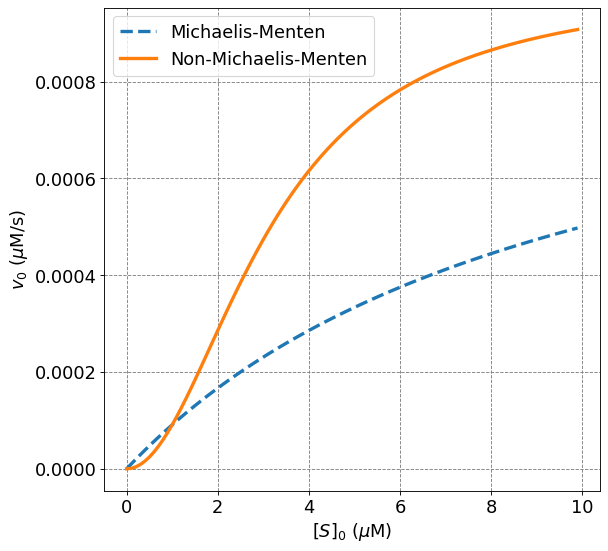

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ ($\mu$M)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def mm(S0,vmax,Km):  
    return vmax*S0/(Km + S0)
def hill(S0,vmax,Km,n):
    return vmax*S0**n/(Km + S0**n)
vmax = 0.001
Km = 10
S0 = np.arange(0,10,0.1)
ax.plot(S0,mm(S0,vmax,Km),'--',lw=3,label="Michaelis-Menten")
ax.plot(S0,hill(S0,vmax,Km,2),'-',lw=3,label="Non-Michaelis-Menten")
plt.legend(fontsize=fontsize)

## Derivation of the Hill Equation

The rate law stemming from the above mechanism can be derived in a similar fashion to the derivation for Michaelis-Menten.  To make the derivation slightly easier, we will assume the second step is irreversible
\begin{align}
E + nS &\overset{k_1}{\underset{k_{-1}}{\overset{\Longrightarrow}{\Longleftarrow}}} ES_n \\
ES_n &\overset{k_2}{\Longrightarrow} E + nP
\end{align}

We start by writing the differential expressions for substrate and enzyme-substrate complex
\begin{align}
-\frac{1}{n}\frac{d[S]}{dt}  &= k_1[E][S]^n - k_{-1}[ES_n] \\
-\frac{d[ES_n]}{dt}  &= (k_2+k_{-1})[ES_n] - k_1[E][S]^n
\end{align}
we can again plug in $[E] = [E]_0 - [ES_n]$ to get
\begin{align}
-\frac{1}{n}\frac{d[S]}{dt}  &= k_1[E]_0[S]^n - (k_{-1}+k_1[S]^n)[ES_n] \\
-\frac{d[ES_n]}{dt}  &= (k_1[S]^n + k_2+k_{-1})[ES_n] - k_1[E]_0[S]^n
\end{align}

Using the steady-state approximation for $[ES_n]$ we get
\begin{equation}
[ES_n] \overset{s.s.}{=} \frac{k_1[E]_0[S]^n}{k_1[S]^n + k_2+k_{-1}}
\end{equation}

Plugging this into the rate equation
\begin{align}
v_0 = -\frac{1}{n}\frac{d[S]_0}{dt}  &= k_1[E]_0[S]_0^n - (k_{-1}+k_1[S]_0^n)\frac{k_1[E]_0[S]_0^n}{k_1[S]_0^n + k_2+k_{-1}}\\
&= \frac{k_1[E]_0[S]_0^n\cdot(k_1[S]_0^n + k_2+k_{-1})-(k_{-1}+k_1[S]_0^n)k_1[E]_0[S]_0^n}{k_1[S]_0^n + k_2+k_{-1}} \\
&= \frac{k_1[E]_0[S]_0^n\cdot(k_1[S]_0^n + k_2+k_{-1})-k_{-1}k_1[E]_0[S]_0^n - k_1^2[E]_0[S]_0^{2n}}{k_1[S]_0^n + k_2+k_{-1}} \\
&= \frac{k_1k_2[E]_0[S]_0^n}{k_1[S]_0^n + k_2+k_{-1}} \\
&= \frac{k_2[E]_0[S]_0^n}{[S]_0^n + K_m}
\end{align}
where $K_m = \frac{k_2+k_{-1}}{k_1}$ is defined similar to the Michaelis-Menten constant.

We see that the resulting initial rate law is very similar to the Michaelis-Menten rate law.  Indeed, they are identical for $n=1$ as they should be (the mechanism is then the same).  

The final Hill equation is given as 
\begin{equation}
v_0 = \frac{v_{max}[S]_0^n}{[S]_0^n + K_m}
\end{equation}
where $n$ is referred to as the Hill number.  While it is appealing to interpret $n$ as the number of substrates/ligands that bind to the enzyme, the Hill mechanism is so unphysical (simultaneous binding) that this interpretation is not necessarily true.  Nonetheless, this mechanism and equation are used to fit enzyme kinetics and determine whether an enzyme displays cooperativity (negative or positive) or not.

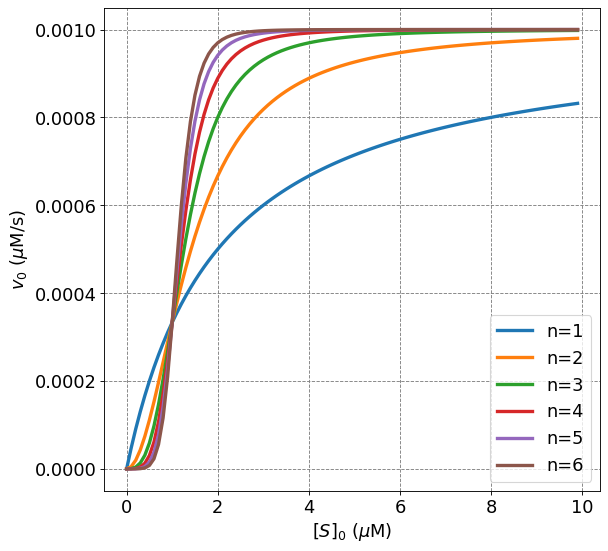

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ ($\mu$M)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def hill(S0,vmax,Km,n):
    return vmax*S0**n/(Km + S0**n)
vmax = 0.001
Km = 2
S0 = np.arange(0,10,0.1)
ax.plot(S0,hill(S0,vmax,Km,1),'-',lw=3,label="n=1")
ax.plot(S0,hill(S0,vmax,Km,2),'-',lw=3,label="n=2")
ax.plot(S0,hill(S0,vmax,Km,3),'-',lw=3,label="n=3")
ax.plot(S0,hill(S0,vmax,Km,4),'-',lw=3,label="n=4")
ax.plot(S0,hill(S0,vmax,Km,5),'-',lw=3,label="n=5")
ax.plot(S0,hill(S0,vmax,Km,6),'-',lw=3,label="n=6")
plt.legend(fontsize=fontsize)

## Positive and Negative Cooperativity

Both positive and negative cooperativity can be observed.  Negative cooperativity simply means that binding of one ligand negatively impacts the binding of the second ligand.  There is still cooperativity but the impact is to negate the binding of the second ligand.  The Hill equation can be used to fit this type of behavior and it will be observed for values of $n<1$.  Let's look at a plot of different $n$ values.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ ($\mu$M)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def hill(S0,vmax,Km,n):
    return vmax*S0**n/(Km + S0**n)
vmax = 0.001
Km = 2
S0 = np.arange(0,80000000,1.0)
ax.plot(S0,hill(S0,vmax,Km,1),'-',lw=3,label="n=1")
ax.plot(S0,hill(S0,vmax,Km,2),'-',lw=3,label="n=2")
ax.plot(S0,hill(S0,vmax,Km,3),'-',lw=3,label="n=3")
ax.plot(S0,hill(S0,vmax,Km,4),'-',lw=3,label="n=4")
ax.plot(S0,hill(S0,vmax,Km,0.1),'-',lw=3,label="n=0.1")
ax.plot(S0,hill(S0,vmax,Km,0.2),'-',lw=3,label="n=0.2")
ax.plot(S0,hill(S0,vmax,Km,0.3),'-',lw=3,label="n=0.3")
ax.plot(S0,hill(S0,vmax,Km,0.4),'-',lw=3,label="n=0.4")
ax.plot(S0,hill(S0,vmax,Km,0.5),'-',lw=3,label="n=0.5")
plt.legend(fontsize=fontsize)

From the above plot we observe a number of differences between curves displaying positive cooperativity ($n>1$) and negative cooperativity ($n<1).

1. Negative cooperativity displays a more rapid initial increase in $v_0$ as compared to MM or positive cooperative behavior
2. The rate of all value is equivalent at $[S]_0 = 1$ $\mu$M.
3. The rate of negative cooperative enzymes is lower than MM or positive cooperative behvaior for $[S]_0 > 1$
4. Postive cooperative and MM curves all approach $v_{max}$ asymptotically.
5. Negative cooperative curves do not approach $v_{max}$ asymptotically.

## Fitting the Hill Equation

When fitting the Hill equation, we must consider the Michaelis-Menten like parameters ($v_{max}$ and $K_m$) as well as the Hill number, $n$.  To fit these values, we have options:

1. Use non-linear fitting of the equation
2. Linearize in a Lineweaver-Burk style equation

Consider the second case, we must write the reciprocal Hill equation
\begin{equation}
\frac{1}{v_0} = \frac{K_m}{v_{max}}\frac{1}{[S]_0^n} + \frac{1}{v_{max}}
\end{equation}
Observe that this equation suggests that $\frac{1}{v_0}$ vs $\frac{1}{[S]_0^n}$ will be linear with slope $\frac{K_m}{v_{max}}$ and intercept $\frac{1}{v_{max}}$.   To use this equation in a linear least-squares fitting procedure, we will need to plot $\frac{1}{v_0}$ vs $\frac{1}{[S]_0}$, $\frac{1}{v_0}$ vs $\frac{1}{[S]_0^2}$, $\frac{1}{v_0}$ vs $\frac{1}{[S]_0^3}$, $...$, fit lines to each one and determine the best fit by comparing $R^2$ values.  This is not ideal, and, additionally, $n$ can take on non-integer values.  We see that non-linear fitting is the appropriate way to go here. 

Let's see how it is done.

### Example: Fitting the Hill Equation for $n=1$

In this example, we will use the same data as the example from the Michaelis-Menten notes.  Thus, we expect to get a fit with $n\approx1$.  The data is as follows

| $[S]_0$ (mM) | $v_0$ ($\mu$M/s) |
| :----------- | :--------------- |
|   1          | 2.5              |
|   2          | 4.0              |
| 5            | 6.3              |
| 10           | 7.6              |
| 20           | 9.0              |

In [18]:
# Put the datat into numpy arrays
s0 = np.array([1,2,5,10,20.0])
v0 = np.array([2.5,4.0,6.3,7.6,9.0])

Perform the non-linear fit and get the parameters:

In [20]:
# perform non-linear fit
# import least squares function from scipy library
from scipy.optimize import least_squares
# define Michaelis-Menten function
def hill(x,s):  
    return x[0]*s**x[2]/(x[1] + s**x[2])
# define residual function (difference between function and data)
def loss(x,s,data):
    return hill(x,s) - data
# make an initial guess of parameters
x0 = np.array([1.0,1.0,1.0])
res_lsq = least_squares(loss, x0, args=(s0, v0))
print("v_max = ", np.round(res_lsq.x[0],1), "micro M/s")
print("Km = ", np.round(res_lsq.x[1],1), "mM")
print("n = ", np.round(res_lsq.x[2],1), "unitless")

v_max =  10.8 micro M/s
Km =  3.2 mM
n =  0.9 unitless


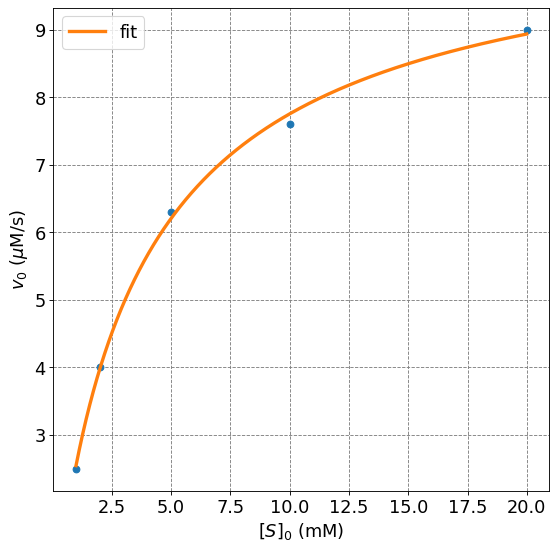

In [21]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ (mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(s0,v0,'o',lw=2)
s = np.arange(np.amin(s0),np.amax(s0),0.01)
ax.plot(s,hill(res_lsq.x,s),lw=3,label="fit")
plt.legend(fontsize=fontsize)

### Example: Fitting the Hill Equation for $n$ Different than 1

Consider the following data, fit the Hill equation

| $[S]_0$ (mM) | $v_0$ ($\mu$M/s) |
| :----------- | :--------------- |
|   0.05          | 0.10           |
|   1          | 1.26             |
|   2          | 4.55             |
| 5            | 7.18             |
| 10           | 7.52             |
| 20           |  7.42             |

In [2]:
# Put the data into numpy arrays
import numpy as np
s0 = np.array([0.5,1,2,5,10,20.0])
v0 = np.array([0.19,1.26,4.55,7.18,7.52,7.42])

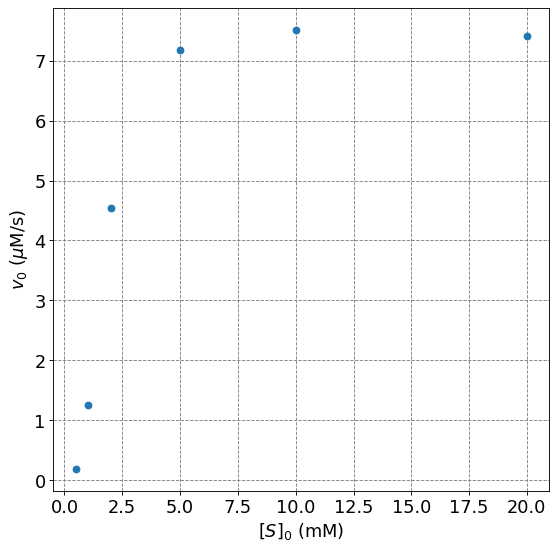

In [20]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ (mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(s0,v0,'o',lw=2)

Perform the non-linear fit to the Hill equation and get the parameters:

In [4]:
# perform non-linear fit
# import least squares function from scipy library
from scipy.optimize import curve_fit
# define Michaelis-Menten function
def hill(s,vmax,Km,n):  
    return vmax*s**n/(Km + s**n)
# make an initial guess of parameters
x0 = np.array([1.0,1.0])
popt, pcov = curve_fit(hill, s0, v0)
err = np.sqrt(np.diag(pcov))
print("v_max = ", np.round(popt[0],2),"+/-", np.round(err[0],2), "muM/s")
print("Km = ", np.round(popt[1],1),"+/-", np.round(err[1],1), "mM")
print("n = ", np.round(popt[2],1),"+/-", np.round(err[2],1))

v_max =  7.49 +/- 0.04 muM/s
Km =  5.0 +/- 0.2 mM
n =  2.9 +/- 0.1


Perform a non-linear fit the MM equation for reference:

In [22]:
# perform non-linear fit
# import least squares function from scipy library
from scipy.optimize import curve_fit
# define Michaelis-Menten function
def mm(s,vmax,Km):  
    return vmax*s/(Km + s)
# make an initial guess of parameters
x0 = np.array([1.0,1.0])
popt_mm, pcov = curve_fit(mm, s0, v0)
err_mm = np.sqrt(np.diag(pcov))
print("v_max = ", np.round(popt_mm[0],1),"+/-", np.round(err_mm[0],1), "muM/s")
print("Km = ", np.round(popt_mm[1],1),"+/-", np.round(err_mm[1],1), "mM")

v_max =  9.4 +/- 1.5 muM/s
Km =  2.8 +/- 1.4 mM


Plot the results:

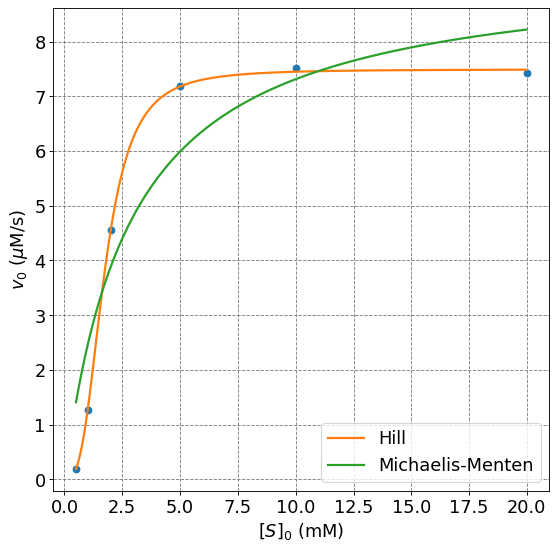

In [23]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ (mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(s0,v0,'o',lw=2)
s = np.arange(0.5,20,0.01)
ax.plot(s,hill(s,popt[0],popt[1],popt[2]),lw=2,label="Hill")
ax.plot(s,mm(s,popt_mm[0],popt_mm[1]),lw=2,label="Michaelis-Menten")
plt.legend(fontsize=fontsize)

## Example: Multiple Data Sets

In [7]:
from tabulate import tabulate
import numpy as np
s0 = np.array([1,2,5,10,20.0])
# Generate a data set
def hill(S0,vmax,Km,n):  
    return vmax*S0**n/(Km + S0**n)
vmax = 7.5
Km = 4.0
n = 0.5
truth = hill(s0,vmax,Km,n)
n_trials = 1
data = np.empty((truth.shape[0],n_trials))
s0_total = np.empty((s0.shape[0],n_trials))
for i in range(n_trials):
    # estimate error based on normal distribution 99.9% data within 7.5%
    error = np.random.normal(0,0.03,truth.shape[0])
    # estimate error from uniform distribution with maximum value of 5%
    #error = 0.1*(np.random.rand(truth.shape[0])-0.5)
    # generate data by adding error to truth
    data[:,i] = truth*(1+error)
    # keep flattened s0 array
    s0_total[:,i] = s0
combined_data = np.column_stack((s0,data))
print(tabulate(combined_data,headers=["[S]0","Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5"]))

  [S]0    Trial 1
------  ---------
     1    1.5454
     2    2.0766
     5    2.75409
    10    3.23132
    20    3.74453


In [8]:
# perform non-linear fit
# import least squares function from scipy library
from scipy.optimize import curve_fit
# define Michaelis-Menten function
def hill(s,vmax,Km,n):  
    return vmax*s**n/(Km + s**n)
# make an initial guess of parameters
popt, pcov = curve_fit(hill, s0_total.flatten(), data.flatten())
err = np.sqrt(np.diag(pcov))
print("v_max = ", np.round(popt[0],1),"+/-", np.round(err[0],1), "muM/s")
print("Km = ", np.round(popt[1],1),"+/-", np.round(err[1],1), "mM")
print("n = ", np.round(popt[2],1),"+/-", np.round(err[2],1))

v_max =  5.2 +/- 0.4 muM/s
Km =  2.3 +/- 0.2 mM
n =  0.6 +/- 0.1
